In [1]:
#import the libraries
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns

In [2]:
#get the file path
path= "/Users/ranjitsingh/Downloads/image.jpg"

In [3]:
#Read the image and convert to greyscale
img = Image.open(path)
print(img.format)
print(img.size)
print(img.mode)
imgGray = img.convert('L')
imgGray.save('test_gray.jpg')

JPEG
(1920, 1440)
RGB


In [5]:
#Check new greyscale data
gs_data = Image.open('test_gray.jpg')
print(gs_data.format)
print(gs_data.size)
print(gs_data.mode)

JPEG
(1920, 1440)
L


In [6]:
# Calculating the SVD
u, s, v = np.linalg.svd(gs_data, full_matrices=False)

In [7]:
# inspect shapes of the matrices
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')

u.shape:(1440, 1440),s.shape:(1440,),v.shape:(1440, 1920)


variance Explained by Top 20 singular values:
[0.779717 0.029663 0.026808 0.014038 0.010896 0.010004 0.008795 0.007623
 0.007056 0.006347 0.005301 0.005108 0.003947 0.003902 0.00361  0.00332
 0.002859 0.002726 0.002592 0.002059]


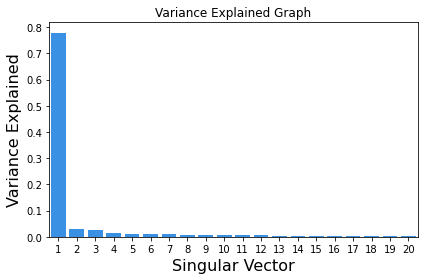

In [8]:
var_explained = np.round(s**2/np.sum(s**2), decimals=6)
 
# Variance explained top Singular vectors
print(f'variance Explained by Top 20 singular values:\n{var_explained[0:20]}')
 
sns.barplot(x=list(range(1, 21)),
            y=var_explained[0:20], color="dodgerblue")
 
plt.title('Variance Explained Graph')
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.show()

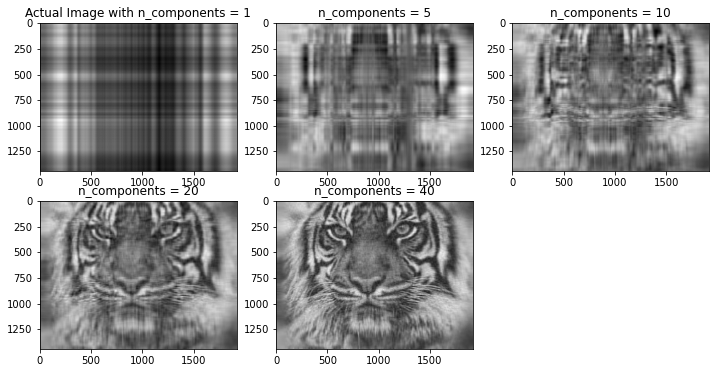

In [9]:

# plot images with different number of components
comps = [ 1, 5, 10, 20, 40]
plt.figure(figsize=(12, 6))
 
for i in range(len(comps)):
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]
     
    if(i == 0):
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'Actual Image with n_components = {comps[i]}')
     
    else:
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'n_components = {comps[i]}')